In [1]:
from sys import stdout

import numpy as np
import matplotlib.pyplot as plt

# to check how far off my implementation is
from sklearn.cluster import KMeans

In [2]:
# generating 2 sets of gaussian data

mean, cov = [1, 0], [[.9, .4],[.4,.9]]
mean2 = [0, 1.5]

x1 = np.random.multivariate_normal(mean, cov, 500)
x2 = np.random.multivariate_normal(mean2, cov, 500)

x = np.concatenate((x1, x2))

In [3]:
# to make easier to plot and get find centers, this returns
# both centers and clusters

def mykmeans(x, k, c=None):
    """
    X - R^n*p where n number of objects, p number of attributes
    k - clusters, int
    c - initial centers, np.array shape (k, 2)
    
    return (centers, clusters)
    """
    
    if not x.any() or not k:
        print('x or k not supplied!')
        return
    
    if not c.any():
        #pick random centers
        c = np.array([x[i] for i in np.random.choice(np.arange(len(x)), k)])
            
    # main loop
    it = 0
    retclus = []
    
    while it < 10000:
        # np.linalg.norm(a-b) finds eucledian distance
        clusters = [[] for i in range(k)]
        
        # put each x[i] in nearest center
        for xi in x:
            # find nearest center
            
            idx = 0 # this is index to save into
            i = 0 # iterator
            nearc = np.linalg.norm(c[0]-xi)
            
            for cen in c:
                cdist = np.linalg.norm(cen-xi)
                if cdist < nearc:
                    idx = i
                    nearc = cdist
                    
                i += 1
                
            # save into nearest center
            clusters[idx].append(xi)
        
        # pick new centers
        new = []
        for cluster in clusters:
            ar = np.array(cluster)
            # edge case
            if len(ar) == 0:
                new.append(x[0])
            else:
                new.append(ar.mean(axis=0))
        
        # convergence: check if l2-norm is <= 0.001 between prev & new center
        diff = np.linalg.norm(c-np.array(new)) 
        if diff <= 0.001:
            break
            
        c = new
        retclus = clusters
        
        it += 1
        if it % 100 == 0:
            stdout.flush()
            print(f'\r{it} iterations done! diff: {diff}', end='')
    
    print(f'Took {it} iterations!')
    
    return c, retclus

## Applying mykmeans in data with k=2 & c1=(10,10) and c2=(-10,-10)

In [4]:
centers, clusters = mykmeans(x, 2, np.array([[10,10], [-10,-10]]))

Took 30 iterations!


In [5]:
# function to make easier to plot
def plotkmeans(centers, clusters):
    converted = []
    for cluster in clusters:
        converted.append(np.stack(cluster))
    clusters = np.array(converted)

    ncenters = []
    for center in centers:
        ncenters.append(np.stack(center))
    centers = np.array(ncenters)
    
    # plotting clusters then centers
    for axis in clusters:
        plt.scatter(axis.T[0], axis.T[1], s=2)
    for center in centers:
        plt.scatter(center[0], center[1], s=50, c='g')
    plt.show()

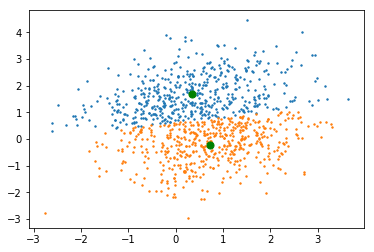

In [6]:
# plotting x1
plotkmeans(centers, clusters)

## Applying mykmeans in data with k=4 & c1=(10,10) and c2=(-10,-10), c3=(10,-10) and c4=(-10,10)

In [7]:
cent = np.array([[10,10], [-10,-10], [10, -10], [-10, 10]]).ravel().reshape(4, 2)
centers1, clusters1 = mykmeans(x, 4, cent)

Took 18 iterations!


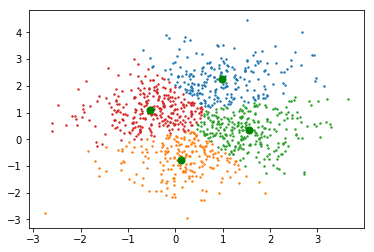

In [8]:
# plotting x1
plotkmeans(centers1, clusters1)